# **Project: Condominium Rental Price Prediction**

## ***Task 1: Scraping Website***

In [ ]:
import bs4
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
page = 1
name_list = []
local_list = []
rental_price_list = []
no_bedroom_list = []
no_bathroom_list = []
areas_list = []
while page <= 8493:
    data = requests.get("https://propertyscout.co.th/en/bangkok/rentals/page-"+str(page)+"/")
    soup = bs4.BeautifulSoup(data.text)
    for r in soup.find_all('div', {'class': 'Rental_card__content__BV1iK bg-secondary-darkwhite'}):
        name_list.append(r.find('div', {'class': 'Rental_card__content_head__xYjvP'}).text.replace("like",""))
        local_list.append(r.find('p').text)
        rental_price_list.append(int(r.find('b').text.split('/')[0].replace("฿","").replace(",","")))
        info = r.find('div', {'class', 'Rental_card__info__mX8Bo'})
        no_bedroom_list.append(int(info.find('div').text.split()[0]))
        no_bathroom_list.append(int(info.find('span', {'class': 'Rental_card__icon_detail__bathroom__2vKGM'}).text.split()[0]))
        areas_list.append(float(info.find('span', {'class': 'Rental_card__icon_detail__sqm__B4FGR'}).text.split()[0]))
    print('Complete page number: ', page)
    page += 1

table = pd.DataFrame([name_list, local_list, rental_price_list, no_bedroom_list, no_bathroom_list, areas_list]).transpose()
table.columns = ["name", "location", "rental_price", "bedroom", "bathroom", "areas"]
table.set_index("name")

Streaming output truncated to the last 5000 lines.
Complete page number:  3494
Complete page number:  3495
Complete page number:  3496
Complete page number:  3497
Complete page number:  3498
Complete page number:  3499
Complete page number:  3500
Complete page number:  3501
Complete page number:  3502
Complete page number:  3503
Complete page number:  3504
Complete page number:  3505
Complete page number:  3506
Complete page number:  3507
Complete page number:  3508
Complete page number:  3509
Complete page number:  3510
Complete page number:  3511
Complete page number:  3512
Complete page number:  3513
Complete page number:  3514
Complete page number:  3515
Complete page number:  3516
Complete page number:  3517
Complete page number:  3518
Complete page number:  3519
Complete page number:  3520
Complete page number:  3521
Complete page number:  3522
Complete page number:  3523
Complete page number:  3524
Complete page number:  3525
Complete page number:  3526
Complete page number:  35

,location,rental_price,bedroom,bathroom,areas
name,,,,,
Life Sukhumvit 48,"Phra Khanong Tai, Bangkok",18000,1,1,40.0
Modern 1 Bedroom Home Office By MRT Lumpini 12 Months Available,"Thung Maha Mek, Bangkok",40000,1,1,87.5
The Line Asoke Ratchada,"Phra Ram 9, Bangkok",15000,1,1,28.0
Ideo Mobi Asoke,"Bang Kapi, Bangkok",15000,1,1,32.38
Rhythm Asoke Ll,"Phra Ram 9, Bangkok",11000,1,1,23.0
...,...,...,...,...,...
C Ekkamai,"Sukhumvit, Bangkok",18000,1,1,30.0
Baan Sathorn Chaopraya,"Bang Lamphu Lang, Bangkok",27000,1,1,78.0
Rhythm Sukhumvit 36 38,"Thong Lo, Bangkok",19000,1,1,30.0


In [ ]:
table.to_csv("CondominiumRawDataset.csv")

In [ ]:
table = pd.read_csv("CondominiumRawDataset.csv")

In [ ]:
table.shape

(169839, 7)

In [ ]:
df_condo = table[['name', 'location', 'rental_price', 'bedroom', 'bathroom', 'areas']]

In [ ]:
df_condo = df_condo[df_condo.areas < 100]

In [ ]:
df_condo.shape

(149242, 6)

## ***Task 2: Explore & Drop Duplicate row***

In [ ]:
df_condo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149242 entries, 0 to 169838
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   name          149242 non-null  object 
 1   location      149242 non-null  object 
 2   rental_price  149242 non-null  int64  
 3   bedroom       149242 non-null  int64  
 4   bathroom      149242 non-null  int64  
 5   areas         149242 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 8.0+ MB


In [ ]:
df_condo["location"] = df_condo["location"].astype("category")

In [ ]:
df_condo["location"]= df_condo["location"].str.split(",", expand=True)[0]

In [ ]:
df_condo

,name,location,rental_price,bedroom,bathroom,areas
0,Life Sukhumvit 48,Phra Khanong Tai,18000,1,1,40.00
1,Modern 1 Bedroom Home Office By MRT Lumpini 12...,Thung Maha Mek,40000,1,1,87.50
2,The Line Asoke Ratchada,Phra Ram 9,15000,1,1,28.00
3,Ideo Mobi Asoke,Bang Kapi,15000,1,1,32.38
4,Rhythm Asoke Ll,Phra Ram 9,11000,1,1,23.00
...,...,...,...,...,...,...
169834,C Ekkamai,Sukhumvit,18000,1,1,30.00
169835,Baan Sathorn Chaopraya,Bang Lamphu Lang,27000,1,1,78.00
169836,Rhythm Sukhumvit 36 38,Thong Lo,19000,1,1,30.00
169837,Chewathai Pinklao,Pinklao,11500,1,1,24.00


In [ ]:
df_condo["location"].unique()

array(['Phra Khanong Tai', 'Thung Maha Mek', 'Phra Ram 9', 'Bang Kapi',
       'Bang Bon Nuea', 'Bang Chak', 'Naradhiwas Rajanagarindra', 'Asok',
       'Phrom Phong', 'Chatuchak Park', 'Sukhumvit', 'Din Daeng',
       'Tao Poon', 'Thong Lo', 'Ban Chang Lo', 'Saphan Khwai', 'Samre',
       'Khlong San', 'Huai Khwang', 'Wong Wian Yai', 'Makkasan',
       'Krung Thon Buri', 'Thung Wat Don', 'Phra Ram 4',
       'Phra Khanong Nuea', 'Sam Sen Nai', 'Chomphon', 'Wong Sawang',
       'Ramkhamhaeng', 'Suan Luang', 'Bang Wa', 'Ekkamai', 'Khlong Toei',
       'Bang Chak Phasi Charoen', 'Phahon Yothin', 'Pradiphat',
       'Khlong Ton Sai', 'Bang Na Nuea', 'Silom', 'Pracha Chuen',
       'Anusawari', 'Chong Nonsi', 'Phet Rama', 'Phloen Chit', 'Ari',
       'Lumphini', 'Nana', 'Phaya Thai', 'Bang Khlo', 'Surasak',
       'Chit Lom', 'Wat Phraya Krai', 'Pak Khlong Phasi Charoen',
       'Bang O', 'Lang Suan', 'Phra Ram 3', 'Bang Kho Laem', 'Sam Yan',
       'Surawong', 'Sam Sen Nok', 'Lat Yao', 'T

In [ ]:
df_condo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149242 entries, 0 to 169838
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   name          149242 non-null  object 
 1   location      149242 non-null  object 
 2   rental_price  149242 non-null  int64  
 3   bedroom       149242 non-null  int64  
 4   bathroom      149242 non-null  int64  
 5   areas         149242 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 8.0+ MB


df_condo has a correct data type

In [ ]:
df_condo.isnull().sum()

name            0
location        0
rental_price    0
bedroom         0
bathroom        0
areas           0
dtype: int64

df_condo has not had a null value in all columns.

In [ ]:
df_condo = df_condo.drop_duplicates()

In [ ]:
df_condo.shape

(52264, 6)

## ***Task 3: Dealing with Outlier***

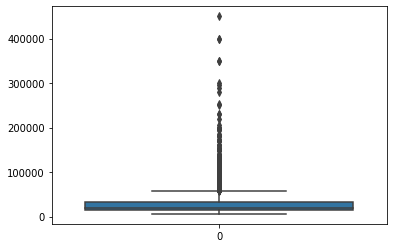

In [ ]:
sns.boxplot(data=df_condo["rental_price"])

In [ ]:
# detect outlier using the Inter Quantile Range(IQR)
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(df_condo["rental_price"])
print("Outliers from IQR method: ", sample_outliers)
print("Number of Outliers from IQR method: ", len(sample_outliers))
print("Minimum of Outliers from IQR method: ", min(sample_outliers))

Outliers from IQR method:  [58500, 58920, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59000, 59500, 59500, 59800, 59900, 59900, 59981, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000,

In [ ]:
df_condo_test = df_condo[df_condo.rental_price < 58500]

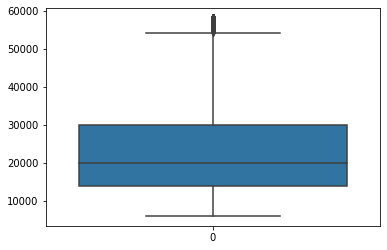

In [ ]:
sns.boxplot(data=df_condo_test["rental_price"])

In [ ]:
df_condo_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49479 entries, 0 to 169837
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          49479 non-null  object 
 1   location      49479 non-null  object 
 2   rental_price  49479 non-null  int64  
 3   bedroom       49479 non-null  int64  
 4   bathroom      49479 non-null  int64  
 5   areas         49479 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 3.7+ MB


## ***Task 4: Find Correlation for each couple columns***

In [ ]:
df_condo_test.corr()

,rental_price,bedroom,bathroom,areas
rental_price,1.000000,0.359300,0.455070,0.649911
bedroom,0.359300,1.000000,0.640385,0.561367
bathroom,0.455070,0.640385,1.000000,0.654237
areas,0.649911,0.561367,0.654237,1.000000


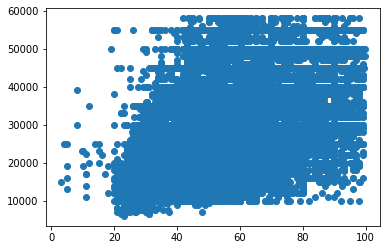

In [ ]:
plt.scatter(df_condo_test["areas"], df_condo_test["rental_price"])
plt.show()

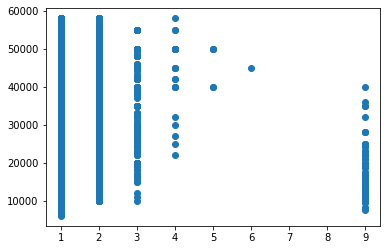

In [ ]:
plt.scatter(df_condo_test["bedroom"], df_condo_test["rental_price"])
plt.show()

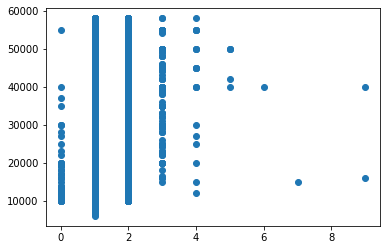

In [ ]:
plt.scatter(df_condo_test["bathroom"], df_condo_test["rental_price"])
plt.show()

## ***Task 5: Build Model to Predict Rental Price***

### **Model: Ridge Regression**

In [ ]:
import sklearn
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
# another model
from sklearn import metrics
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

- Convert location column using OneHotEnCoder

In [ ]:
# creating initial dataframe
location = ('22 July Circle', 'Anusawari', 'Ari', 'Arun Ammarin', 'Asok',
       'BITEC Bangkok International Trade And Exhibition Centre',
       'Ban Chang Lo', 'Ban Khaek', 'Ban Krua', 'Ban Noen', 'Bang Bamru',
       'Bang Bon Nuea', 'Bang Bon Tai', 'Bang Chak',
       'Bang Chak Phasi Charoen', 'Bang Chan', 'Bang Duan', 'Bang Kapi',
       'Bang Khae', 'Bang Khae Nuea', 'Bang Khlo', 'Bang Kho',
       'Bang Kho Laem', 'Bang Khun Si', 'Bang Khun Thian', 'Bang Krabue',
       'Bang Lamphu', 'Bang Lamphu Lang', 'Bang Mot', 'Bang Na Nuea',
       'Bang Na Tai', 'Bang O', 'Bang Pakok', 'Bang Phlat', 'Bang Pho',
       'Bang Phong Phang', 'Bang Rak', 'Bang Son', 'Bang Wa', 'Bang Waek',
       'Bang Yi Khan', 'Bang Yi Ruea', 'Bangkok', 'Banthat Thong',
       'Bearing', 'Bukkhalo', 'Chan Kasem', 'Charan Sanit Wong',
       'Charoen Nakhon', 'Charoen Phon', 'Charoen Rat', 'Chatuchak',
       'Chatuchak Park', 'Chimphli', 'Chinatown Yaowarat', 'Chit Lom',
       'Chok Chai 4', 'Chom Thong', 'Chomphon', 'Chong Nonsi',
       'Chorakhe Bua', 'Chula', 'Chumtang Bang Sue', 'Dao Khanong',
       'Din Daeng', 'Dokmai', 'Don Mueang', 'Dusit', 'Dusit Palace',
       'Ekkamai', 'Faichai', 'Happy Land', 'Hua Mak', 'Huai Khwang',
       'Kaset', 'Khan Na Yao', 'Khlong Chan', 'Khlong Chaokhun Sing',
       'Khlong Kum', 'Khlong San', 'Khlong Thanon', 'Khlong Toei',
       'Khlong Ton Sai', 'Kiak Kai', 'Kluai Nam Thai', 'Krathum Rai',
       'Krung Thon Buri', 'Krungthep Kreetha', 'Lak Si', 'Lam Prathew',
       'Lam Sali', 'Lang Suan', 'Lasalle', 'Lat Phrao', 'Lat Yao',
       'Lumphini', 'Lumphini Park', 'Maha Phruettharam', 'Makkasan',
       'Meng Jai', 'Min Buri', 'Mo Chit', 'Nana',
       'Naradhiwas Rajanagarindra', 'Nawamin', 'Ngam Wong Wan',
       'Nong Bon', 'Nong Khang Phlu', 'Nuan Chan', 'On Nut',
       'Pak Khlong Phasi Charoen', 'Pantip Plaza', 'Patpong',
       'Phahon Yothin', 'Phasi Charoen', 'Phatthanakan', 'Phaya Thai',
       'Phet Rama', 'Phlapphla', 'Phloen Chit',
       'Phra Borom Maha Ratchawang', 'Phra Khanong', 'Phra Khanong Nuea',
       'Phra Khanong Tai', 'Phra Ram 3', 'Phra Ram 4', 'Phra Ram 9',
       'Phrom Phong', 'Phuttha Bucha', 'Pinklao', 'Pracha Chuen',
       'Pracha Songkhro', 'Pradiphat', 'Pratu Nam', 'Prawet',
       'Queen Sirikit Center', 'RCA', 'Ram Inthra', 'Ramkhamhaeng',
       'Rat Burana', 'Ratchadamri', 'Ratchadaphisek', 'Ratchaphruek',
       'Ratchaprarop', 'Ratchawithi', 'Ratchayothin', 'Saen Saep',
       'Sai Mai', 'Sala Daeng', 'Sam Liam Din Daeng', 'Sam Phraeng',
       'Sam Sen Nai', 'Sam Sen Nok', 'Sam Yan', 'Samae Dam', 'Samre',
       'Samsen', 'Sanam Pao', 'Sanambin', 'Saphan Khwai', 'Saphan Lueang',
       'Saphan Mai', 'Saphan Phut Memorial Bridge', 'Saphan Song',
       'Saphan Sung', 'Saphan Taksin', 'Sathon', 'Sathu Pradit',
       'Sena Nikhom', 'Si Kan', 'Si Phraya', 'Si Yan', 'Siam',
       'Sieng Kong', 'Silom', 'Siri Rat', 'Somdet Chao Phraya',
       'Suan Luang', 'Sukhumvit', 'Surasak', 'Surawong', 'Sutthisan',
       'Suvarnabhumi Airport', 'Talat Bang Khen', 'Talat Phlu',
       'Taling Chan', 'Tao Poon', 'Tha Din Daeng', 'Tha Raeng',
       'Thailand Cultural Centre', 'Thanon Chan', 'Thanon Nakhon Chai Si',
       'Thanon Phaya Thai', 'Thanon Phetchaburi', 'Thanon Tok',
       'Thong Lo', 'Thung Maha Mek', 'Thung Phaya Thai',
       'Thung Song Hong', 'Thung Wat Don', 'Udom Suk', 'Uruphong',
       'Victory Monument', 'Wang Thonglang', 'Wat Phraya Krai',
       'Wat Tha Phra', 'Wat Thep Sirin', 'Witthayu', 'Wong Sawang',
       'Wong Wian Yai', 'Yan Nawa')
location_df = pd.DataFrame(location, columns=['location'])
# converting type of columns to 'category'
location_df['location'] = location_df['location'].astype('category')
location_df

,location
0,22 July Circle
1,Anusawari
2,Ari
3,Arun Ammarin
4,Asok
...,...
206,Wat Thep Sirin
207,Witthayu
208,Wong Sawang
209,Wong Wian Yai


In [ ]:
# generate binary values using get_dummies
dum_df = pd.get_dummies(location_df, columns=["location"], prefix=[""] )
# merge with main df bridge_df on key values
location_df = location_df.join(dum_df)
location_df

,location,_22 July Circle,_Anusawari,_Ari,_Arun Ammarin,_Asok,_BITEC Bangkok International Trade And Exhibition Centre,_Ban Chang Lo,_Ban Khaek,_Ban Krua,...,_Uruphong,_Victory Monument,_Wang Thonglang,_Wat Phraya Krai,_Wat Tha Phra,_Wat Thep Sirin,_Witthayu,_Wong Sawang,_Wong Wian Yai,_Yan Nawa
0,22 July Circle,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Anusawari,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ari,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arun Ammarin,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Asok,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,Wat Thep Sirin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
207,Witthayu,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
208,Wong Sawang,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
209,Wong Wian Yai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df_condo_prep = df_condo_test.merge(location_df, on="location", how="left")

In [ ]:
df_condo_prep

,name,location,rental_price,bedroom,bathroom,areas,_22 July Circle,_Anusawari,_Ari,_Arun Ammarin,...,_Uruphong,_Victory Monument,_Wang Thonglang,_Wat Phraya Krai,_Wat Tha Phra,_Wat Thep Sirin,_Witthayu,_Wong Sawang,_Wong Wian Yai,_Yan Nawa
0,Life Sukhumvit 48,Phra Khanong Tai,18000,1,1,40.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Modern 1 Bedroom Home Office By MRT Lumpini 12...,Thung Maha Mek,40000,1,1,87.50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Line Asoke Ratchada,Phra Ram 9,15000,1,1,28.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ideo Mobi Asoke,Bang Kapi,15000,1,1,32.38,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Rhythm Asoke Ll,Phra Ram 9,11000,1,1,23.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49474,Whizdom Connect Sukhumvit,Bang Chak,15500,1,1,28.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49475,The Tree RIO,Bang O,12500,1,1,30.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49476,C Ekkamai,Sukhumvit,20400,1,1,30.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49477,Rhythm Sukhumvit 36 38,Thong Lo,19000,1,1,30.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_condo_prep.columns = df_condo_prep.columns.str.replace("_","")

In [ ]:
df_condo_prep.dropna(inplace=True)

In [ ]:
df_condo_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49479 entries, 0 to 49478
Columns: 217 entries, name to Yan Nawa
dtypes: float64(1), int64(3), object(2), uint8(211)
memory usage: 12.6+ MB


- Using Ridge model to predict rental_price

In [ ]:
model_ridge = Ridge(alpha=10)

In [ ]:
df_condo_prep.columns

Index(['name', 'location', 'rentalprice', 'bedroom', 'bathroom', 'areas',
       '22 July Circle', 'Anusawari', 'Ari', 'Arun Ammarin',
       ...
       'Uruphong', 'Victory Monument', 'Wang Thonglang', 'Wat Phraya Krai',
       'Wat Tha Phra', 'Wat Thep Sirin', 'Witthayu', 'Wong Sawang',
       'Wong Wian Yai', 'Yan Nawa'],
      dtype='object', length=217)

In [ ]:
X = df_condo_prep[['areas', 'bedroom', 'bathroom', '22 July Circle', 'Anusawari', 
        'Ari', 'Arun Ammarin', 'Asok',
       'BITEC Bangkok International Trade And Exhibition Centre',
       'Ban Chang Lo', 'Ban Khaek', 'Ban Krua', 'Ban Noen', 'Bang Bamru',
       'Bang Bon Nuea', 'Bang Bon Tai', 'Bang Chak',
       'Bang Chak Phasi Charoen', 'Bang Chan', 'Bang Duan', 'Bang Kapi',
       'Bang Khae', 'Bang Khae Nuea', 'Bang Khlo', 'Bang Kho',
       'Bang Kho Laem', 'Bang Khun Si', 'Bang Khun Thian', 'Bang Krabue',
       'Bang Lamphu', 'Bang Lamphu Lang', 'Bang Mot', 'Bang Na Nuea',
       'Bang Na Tai', 'Bang O', 'Bang Pakok', 'Bang Phlat', 'Bang Pho',
       'Bang Phong Phang', 'Bang Rak', 'Bang Son', 'Bang Wa', 'Bang Waek',
       'Bang Yi Khan', 'Bang Yi Ruea', 'Bangkok', 'Banthat Thong',
       'Bearing', 'Bukkhalo', 'Chan Kasem', 'Charan Sanit Wong',
       'Charoen Nakhon', 'Charoen Phon', 'Charoen Rat', 'Chatuchak',
       'Chatuchak Park', 'Chimphli', 'Chinatown Yaowarat', 'Chit Lom',
       'Chok Chai 4', 'Chom Thong', 'Chomphon', 'Chong Nonsi',
       'Chorakhe Bua', 'Chula', 'Chumtang Bang Sue', 'Dao Khanong',
       'Din Daeng', 'Dokmai', 'Don Mueang', 'Dusit', 'Dusit Palace',
       'Ekkamai', 'Faichai', 'Happy Land', 'Hua Mak', 'Huai Khwang',
       'Kaset', 'Khan Na Yao', 'Khlong Chan', 'Khlong Chaokhun Sing',
       'Khlong Kum', 'Khlong San', 'Khlong Thanon', 'Khlong Toei',
       'Khlong Ton Sai', 'Kiak Kai', 'Kluai Nam Thai', 'Krathum Rai',
       'Krung Thon Buri', 'Krungthep Kreetha', 'Lak Si', 'Lam Prathew',
       'Lam Sali', 'Lang Suan', 'Lasalle', 'Lat Phrao', 'Lat Yao',
       'Lumphini', 'Lumphini Park', 'Maha Phruettharam', 'Makkasan',
       'Meng Jai', 'Min Buri', 'Mo Chit', 'Nana',
       'Naradhiwas Rajanagarindra', 'Nawamin', 'Ngam Wong Wan',
       'Nong Bon', 'Nong Khang Phlu', 'Nuan Chan', 'On Nut',
       'Pak Khlong Phasi Charoen', 'Pantip Plaza', 'Patpong',
       'Phahon Yothin', 'Phasi Charoen', 'Phatthanakan', 'Phaya Thai',
       'Phet Rama', 'Phlapphla', 'Phloen Chit',
       'Phra Borom Maha Ratchawang', 'Phra Khanong', 'Phra Khanong Nuea',
       'Phra Khanong Tai', 'Phra Ram 3', 'Phra Ram 4', 'Phra Ram 9',
       'Phrom Phong', 'Phuttha Bucha', 'Pinklao', 'Pracha Chuen',
       'Pracha Songkhro', 'Pradiphat', 'Pratu Nam', 'Prawet',
       'Queen Sirikit Center', 'RCA', 'Ram Inthra', 'Ramkhamhaeng',
       'Rat Burana', 'Ratchadamri', 'Ratchadaphisek', 'Ratchaphruek',
       'Ratchaprarop', 'Ratchawithi', 'Ratchayothin', 'Saen Saep',
       'Sai Mai', 'Sala Daeng', 'Sam Liam Din Daeng', 'Sam Phraeng',
       'Sam Sen Nai', 'Sam Sen Nok', 'Sam Yan', 'Samae Dam', 'Samre',
       'Samsen', 'Sanam Pao', 'Sanambin', 'Saphan Khwai', 'Saphan Lueang',
       'Saphan Mai', 'Saphan Phut Memorial Bridge', 'Saphan Song',
       'Saphan Sung', 'Saphan Taksin', 'Sathon', 'Sathu Pradit',
       'Sena Nikhom', 'Si Kan', 'Si Phraya', 'Si Yan', 'Siam',
       'Sieng Kong', 'Silom', 'Siri Rat', 'Somdet Chao Phraya',
       'Suan Luang', 'Sukhumvit', 'Surasak', 'Surawong', 'Sutthisan',
       'Suvarnabhumi Airport', 'Talat Bang Khen', 'Talat Phlu',
       'Taling Chan', 'Tao Poon', 'Tha Din Daeng', 'Tha Raeng',
       'Thailand Cultural Centre', 'Thanon Chan', 'Thanon Nakhon Chai Si',
       'Thanon Phaya Thai', 'Thanon Phetchaburi', 'Thanon Tok',
       'Thong Lo', 'Thung Maha Mek', 'Thung Phaya Thai',
       'Thung Song Hong', 'Thung Wat Don', 'Udom Suk', 'Uruphong',
       'Victory Monument', 'Wang Thonglang', 'Wat Phraya Krai',
       'Wat Tha Phra', 'Wat Thep Sirin', 'Witthayu', 'Wong Sawang',
       'Wong Wian Yai', 'Yan Nawa']].values
Y = df_condo_prep[['rentalprice']].values

In [ ]:
X.shape, Y.shape

((49479, 214), (49479, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape,  X_test.shape, y_train.shape,  y_test.shape

((34635, 214), (14844, 214), (34635, 1), (14844, 1))

In [ ]:
%%time
model_ridge.fit(X_train, y_train)

CPU times: user 198 ms, sys: 39.5 ms, total: 237 ms
Wall time: 148 ms


Ridge(alpha=10)

In [ ]:
y_pred_train = model_ridge.predict(X_train)
y_pred_test = model_ridge.predict(X_test)

In [ ]:
y_pred_train[:10]

array([[23071.64714565],
       [21905.98590037],
       [ 9770.40285426],
       [15773.74085229],
       [28682.30656892],
       [28850.64077672],
       [29494.11517053],
       [27320.32979676],
       [12949.90910415],
       [13758.15664737]])

In [ ]:
y_train[:10]

array([[30000],
       [18000],
       [10500],
       [18000],
       [20000],
       [16000],
       [26000],
       [25000],
       [18000],
       [12000]])

In [ ]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

In [ ]:
print(mse_train,  mse_test)

52708961.54750493 52535860.512554035


In [ ]:
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

In [ ]:
print(mae_train, mae_test)

5315.0411966399215 5303.776906523627


In [ ]:
y_test[:10]

array([[14000],
       [29000],
       [21000],
       [20500],
       [10000],
       [30000],
       [38000],
       [23000],
       [10000],
       [13500]])

In [ ]:
y_pred_test[:10]

array([[14121.40050002],
       [16000.61670028],
       [25879.5914395 ],
       [40897.76888303],
       [11502.11201382],
       [30101.56859419],
       [33365.95040646],
       [25448.97041913],
       [19399.66929209],
       [16381.91478406]])

- Compare another model 

In [ ]:
models=[
    [LinearRegression(), 'LinearRegression'],
    [Ridge(alpha=10), 'RidgeRegression'],
    [Lasso(alpha=10), 'LassoRegression'],
    [DecisionTreeRegressor(max_depth=10), 'DecisionTreeRegressor'],
    [RandomForestRegressor(n_estimators=10, max_depth = 3), 'RandomForestRegressor']
]
ml = []
for model in models:
    mx=model[0]
    mx.fit(X_train, y_train)
    y_pred_train = mx.predict(X_train)
    y_pred_test = mx.predict(X_test)
    mlr_list = [
            model[1],
            metrics.r2_score(y_test, y_pred_test),
            (1 - (1-metrics.r2_score(y_test, y_pred_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)),
            metrics.mean_absolute_error(y_test, y_pred_test),
            metrics.mean_squared_error(y_test, y_pred_test),
            np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
            ]
    ml.append(mlr_list)
    

# Show model performance metrics
ml_summary = pd.DataFrame(ml)
ml_summary.columns = ['model', 'R^2', 'Adjust R^2', 'MAE', 'MSE', 'RMSE']
ml_summary

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


,model,R^2,Adjust R^2,MAE,MSE,RMSE
0,LinearRegression,-6.584315e+16,-6.680633e+16,8.064724e+10,8.705441e+24,2.950498e+12
1,RidgeRegression,6.026478e-01,5.968351e-01,5.303777e+03,5.253586e+07,7.248163e+03
2,LassoRegression,5.861511e-01,5.800971e-01,5.454364e+03,5.471697e+07,7.397092e+03
3,DecisionTreeRegressor,5.622014e-01,5.557970e-01,5.643187e+03,5.788348e+07,7.608119e+03
4,RandomForestRegressor,4.975806e-01,4.902309e-01,6.128687e+03,6.642731e+07,8.150295e+03
